# Understading the problem

- This task involves Binary Classification.
- The dataset consists of two classes: approved and denied, representing the outcome of credit requests.
- Our objective is to develop a robust machine learning model capable of accurately predicting whether an individual's credit request should be approved or denied.
- This method proves highly beneficial for banks and credit companies as it enhances resource allocation and reduces the risk of loan defaults.

# Installing and Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Data Processing

### Mounting at Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Initial analysis

##### Reading the datasets

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Credit-Analisys-Classification/data/TRAIN.xls', delimiter='\t')
test_df = pd.read_csv('/content/drive/MyDrive/Credit-Analisys-Classification/data/TEST.cod', delimiter='\t')

In [5]:
train_df.head()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0


In [6]:
test_df.head()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.898745,1,...,0,1,1,1,0,0,0,0,1,0
1,1,1,1,0,1,0,0,0,0.847404,1,...,0,0,0,1,1,1,0,0,1,0
2,2,1,1,0,0,0,0,1,0.016513,0,...,0,1,0,0,1,0,0,1,0,1
3,3,1,1,0,1,0,0,0,0.688950,0,...,0,0,0,0,0,1,0,1,1,0
4,4,0,1,1,0,0,1,0,0.230114,1,...,0,1,0,0,1,0,1,0,1,0


In [7]:
train_df.shape

(389196, 246)

In [8]:
test_df.shape

(129733, 246)

In [9]:
columns = test_df.columns
Class = columns[-1]
print(Class)

IND_BOM_1_2


In [10]:
train_df.isnull().sum()

INDEX          0
UF_1           0
UF_2           0
UF_3           0
UF_4           0
              ..
CEP4_12        0
CEP4_13        0
CEP4_14        0
IND_BOM_1_1    0
IND_BOM_1_2    0
Length: 246, dtype: int64

In [11]:
test_df.isnull().sum()

INDEX          0
UF_1           0
UF_2           0
UF_3           0
UF_4           0
              ..
CEP4_12        0
CEP4_13        0
CEP4_14        0
IND_BOM_1_1    0
IND_BOM_1_2    0
Length: 246, dtype: int64

In [12]:
train_df.describe()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,...,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,194597.500000,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,...,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,112351.352021,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,...,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97298.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.507866e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,194597.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375241e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,291896.250000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.578835e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,389195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
test_df.describe()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,1.297330e+05,129733.000000,...,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000,129733.000000
mean,64866.000000,0.889982,0.689601,0.476517,0.298174,0.240964,0.218117,0.186645,4.545588e-01,0.520931,...,0.425034,0.418552,0.424503,0.462889,0.439726,0.435124,0.432172,0.440273,0.655446,0.344554
std,37450.835574,0.312914,0.462659,0.499450,0.457458,0.427670,0.412969,0.389628,2.534801e-01,0.499564,...,0.494350,0.493324,0.494269,0.498623,0.496356,0.495775,0.495380,0.496422,0.475224,0.475224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32433.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.508434e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.371834e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,97299.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.560093e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,129732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Separating in label and input
X_test = test_df.drop([Class], axis=1)
y_test = test_df[Class]

In [15]:
# Separating in label and input
X_train_ = train_df.drop([Class], axis=1)
y_train_ = train_df[Class]

# Split train data into train and validationm -> maintain proportion of classes
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=1/3, random_state=42)


#### Checking for imbalance

In [16]:
y_test.value_counts()

0    85033
1    44700
Name: IND_BOM_1_2, dtype: int64

In [17]:
y_train.value_counts()

0    169921
1     89543
Name: IND_BOM_1_2, dtype: int64

In [18]:
y_val.value_counts()

0    85177
1    44555
Name: IND_BOM_1_2, dtype: int64

Detected -> 2:1 ratio

<Axes: ylabel='IND_BOM_1_2'>

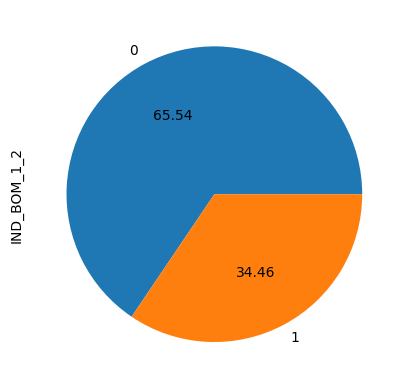

In [19]:
y_test.value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='IND_BOM_1_2'>

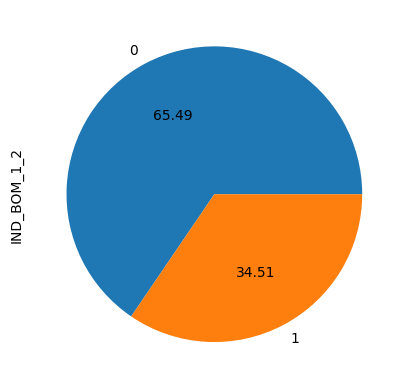

In [20]:
# Pie plot - distribution of classes
y_train.value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='IND_BOM_1_2'>

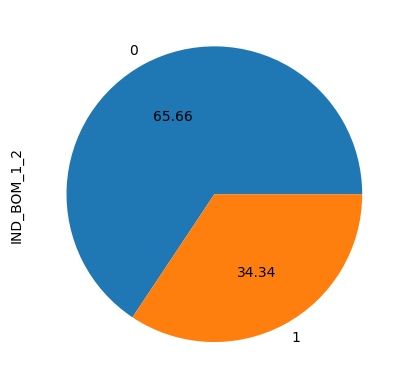

In [21]:
# Pie plot - distribution of classes
y_val.value_counts().plot.pie(autopct='%.2f')

All three datasets present imbalance of classes, and the proportions are maintained.

### Balancing the Dataset

- As we're dealing with an imbaleced dataset, we want to make sure the training and validation data are balanced.
- We don't need to balance the test data, hence it is supposed to be a representation of the real world
- In this process we've got to be careful not to overlap datasamples among the datasets

### Random Oversampling

- This method consists on randomly oversampling the minor class, so that the amount of data samples in both classes are balanced (around 50-50)
- Using "not majority" strategy: resample all the classes unless the majority one

In [22]:
# Instance of the oversampler
r_oversampler = RandomOverSampler(sampling_strategy="not majority")

# Perfoming oversampling on validation and training data
X_train_res, y_train_res = r_oversampler.fit_resample(X_train, y_train)
X_val_res, y_val_res = r_oversampler.fit_resample(X_val, y_val)

###### Result

In [23]:
y_train_res.value_counts()

0    169921
1    169921
Name: IND_BOM_1_2, dtype: int64

<Axes: ylabel='IND_BOM_1_2'>

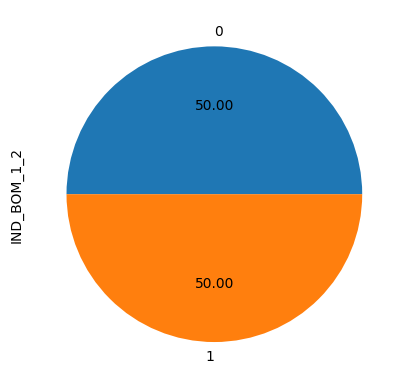

In [24]:
y_train_res.value_counts().plot.pie(autopct='%.2f')

In [25]:
y_val_res.value_counts()

1    85177
0    85177
Name: IND_BOM_1_2, dtype: int64

<Axes: ylabel='IND_BOM_1_2'>

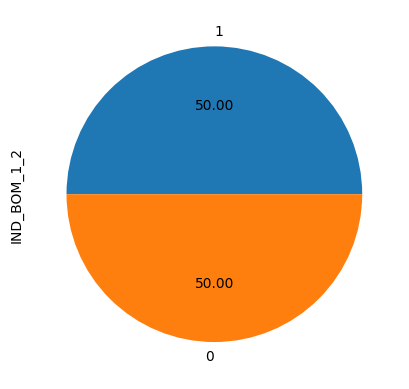

In [26]:
y_val_res.value_counts().plot.pie(autopct='%.2f')

##### Checking for intersections between data

In [27]:
# Perform intersection based on selected columns
common_records_df = X_train_res.merge(X_val_res)

In [28]:
if not common_records_df.empty:
    print("Common records found:")
    print(common_records_df)
else:
    print("No common records found.")

No common records found.


# Our approach

Our stategy is begin with simpler classifiers and attempt to optimize them to serve as a baseline. Once achieving satisfactory performance with the simpler classifiers, progress to more complex techniques and explore the use of auto machine learning to discover the optimal hyperparameters and the best model.


## MLP

### Training

### Testing

### Fine Tuning

### Conclusions

## Random Forest

### Training

### Testing

### Fine Tuning

### Conclusions

## Classifiers Ensemble (MLPs)

### The ensembling techniques used in this section are:

- Bagging (MLPs)
- Voting (Various Models)

*Random forest was discussed in the previous section and ensembling by Boosting is going to be our next approach.*



### Bagging Ensemble

##### First test on bagging

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Train cell use careffuly -> 12+hours to train in google's t4 gpu

bag_model = BaggingClassifier(
    estimator = MLPClassifier(),
    n_estimators = 50,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)

bag_model.fit(X_train_res, y_train_res)

In [35]:
bag_model.oob_score_

0.9999646894733435

In [32]:
predictions = bag_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9999691674439041


In [33]:
predictions_val = bag_model.predict(X_val_res)

accuracy_val = accuracy_score(y_val_res, predictions_val)
print("Accuracy on val:", accuracy_val)

Accuracy on val: 0.9999647792244385


## Gradient Boosting

### Training

### Testing

### Fine Tuning

### Conclusions